In [2]:
#import libraries
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

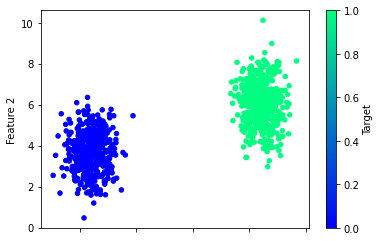

In [3]:
#generate dummy dataset
X, y= make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#creating a dataframe with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

#plotting the dummy data
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [4]:
#split dataset using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=78)

In [5]:
#create a scaler instance
X_scaler= skl.preprocessing.StandardScaler()

#fit the scaler
X_scaler.fit(X_train)

#scale the data
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

To start the neural network model first start with the sequential model

In [6]:
#create Keras Sequential Model
#nn_model will store entire architectute of the neural network model
nn_model= tf.keras.models.Sequential() 

In [7]:
#add first Dense layer, including the input layer
#input and hidden layer 
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [8]:
#add the output layer that uses a probability activation function
#output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [9]:
#check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


ONE HOT ENCODER

In [11]:
#read in ramen data
ramen_df= pd.read_csv('ramen-ratings.csv')

#print out the country value counts
country_counts=ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Poland             4
Fiji               4
Holland            4
Sarawak            3
Dubai              3
Sweden             3
Finland            3
Estonia            2
Ghana              2
Nigeria            1
United States      1
Name: Country, dtype: int64

use a density plot to identify where the value counts fall off

<AxesSubplot:ylabel='Density'>

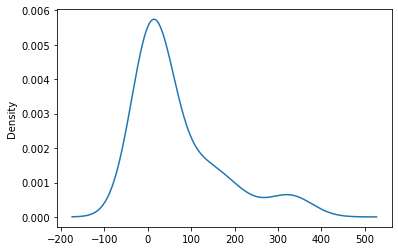

In [12]:
#visualize the value counts
country_counts.plot.density()

#bucket anything that appears fewer than 100 times as 'other'

In [13]:
#bucket the values fewer than 100

#determine which values to replace
replace_countries= list(country_counts[country_counts < 100].index)

#replace in dataframe
for country in replace_countries:
    ramen_df.Country= ramen_df.Country.replace(country, 'other')

#check binning
ramen_df.Country.value_counts()

other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [14]:
#create one hot encoder instance
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder(sparse=False)

#fit the encoder and produce the encoded dataframe
encode_df= pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

#rename the encoded columns
encode_df.columns= enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam,Country_other
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
#merge the two dataframes together and drop the country column
ramen_df.merge(encode_df, left_index=True, right_index=True).drop('Country', 1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam,Country_other
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


STANDARDIZATION

In [18]:
from sklearn.preprocessing import StandardScaler

#read in dataset
hr_df= pd.read_csv('hr_dataset.csv')
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [19]:
#create the StandardScaler instance
scaler= StandardScaler()

In [20]:
#fit the standardscaler
scaler.fit(hr_df)

StandardScaler()

In [21]:
#scale the data
scaled_data= scaler.transform(hr_df)

In [23]:
#create a dataframe witht the scaled data
transformed_scaled_data= pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656
